In [1]:
import sys; sys.path.insert(0, '..')
from cmdp import consMDP
from cmdp import dot

In [2]:
%%writefile reachability_examples.py
#!/usr/bin/env python
import sys; sys.path.insert(0, '..')
from cmdp import consMDP
from cmdp import dot


# ## Almost sure reachability example
#  * it should distinguish between positive and almost-sure reachability:
#    - target that does not reach any other target
#    - target reachable by an action that can lead to a dead-end for a low cost (and maybe has another way to reach the target surely for a high cost) 
#  * the good path goes via at least one reload
#    - the reload should be enabled by the same state
# 
# Capacity should be 25
def basic():
    dot.dotpr = "neato"
    m = consMDP.ConsMDP()

    m.new_states(9)
    for s in [0, 7]:
        m.set_reload(s)

    m.add_action(0, {1:1}, "", 1)
    m.add_action(1, {0:1}, "", 1)
    m.add_action(2, {1:1}, "", 1)
    m.add_action(3, {2:.5, 1:.5}, "", 1)
    m.add_action(3, {4:.5, 6:.5},"t", 10)
    m.add_action(4, {5:1}, "t", 1)
    m.add_action(5, {6:1}, "r", 1)
    m.add_action(6, {3:.5, 7:.5}, "t", 6)
    m.add_action(6, {7:1}, "r", 1)
    m.add_action(7, {3:1}, "", 20)
    m.add_action(7, {6:1}, "t", 3)
    m.add_action(8, {7:.5, 2:.5}, "", 5)

    targets = set([2,5])
    
    return m, targets

def little_alsure():
    dot.dotpr = "dot"
    m = consMDP.ConsMDP()
    m.new_states(4)
    for r in [3]:
        m.set_reload(r)
    m.add_action(0, {1:.5, 2:.5}, "t", 2)
    m.add_action(1,{3:1}, "r", 1)
    m.add_action(2,{3:1}, "r", 2)
    m.add_action(3,{3:1}, "r", 3)
    m.add_action(0,{1:.5, 3:.5},"pos",1)

    targets=set([1,2])
    return m, targets

def little_alsure2():
    m, T = little_alsure()
    m.new_state()
    m.add_action(4, {0:.5, 2:.5}, "", 1)
    return m, T

def ultimate():
    dot.dotpr="neato"
    m = consMDP.ConsMDP()
    m.new_states(11)
    for r in [2,4,9]:
        m.set_reload(r)
    T = {7, 8, 10}

    m.add_action(0,{1:.5,2:.5}, "a", 1)
    m.add_action(0,{3:.5,4:.5}, "t", 3)
    m.add_action(1,{2:1},"",1)
    m.add_action(2,{1:1},"",1)

    m.add_action(3,{2:.5, 7:.5},"p",1)
    m.add_action(3,{5:1},"r",2)
    m.add_action(3,{6:1},"a",3)

    m.add_action(4,{5:1},"",1)
    m.add_action(5,{4:1},"r",1)
    m.add_action(5,{3:1},"t",1)

    m.add_action(6,{7:.5, 10:.5}, "a", 3)
    m.add_action(6,{3:.5, 8:.5}, "B", 6)

    m.add_action(7,{9:1}, "", 1)
    m.add_action(9,{9:1}, "", 1)
    m.add_action(10,{9:1}, "", 1)

    m.add_action(8,{5:1}, "r", 3)

    return m, T

Overwriting reachability_examples.py


## Almost sure reachability example -- basic
 * it should distinguish between positive and almost-sure reachability:
   - target that does not reach any other target
   - target reachable by an action that can lead to a dead-end for a low cost (and maybe has another way to reach the target surely for a high cost) 
 * the good path goes via at least one reload
   - the reload should be enabled by the same state

For capacity <=11 the reload 7 gets disabled for positive reachability. For almost sure, we need at least capacity 22+.

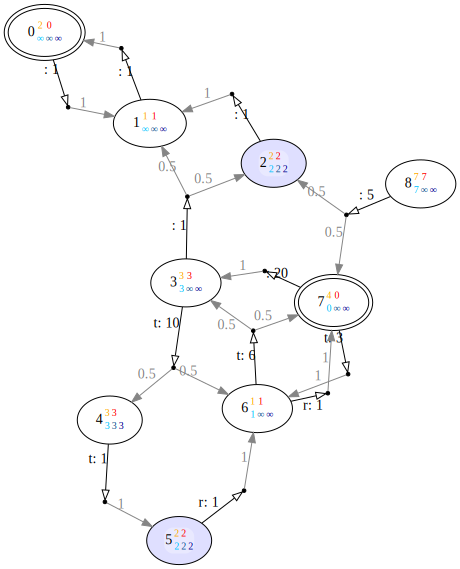

In [3]:
import reachability_examples
m, t = reachability_examples.basic()
m.get_positiveReachability(t, 21)
m.get_almostSureReachability(t, 21)
m.show("M")

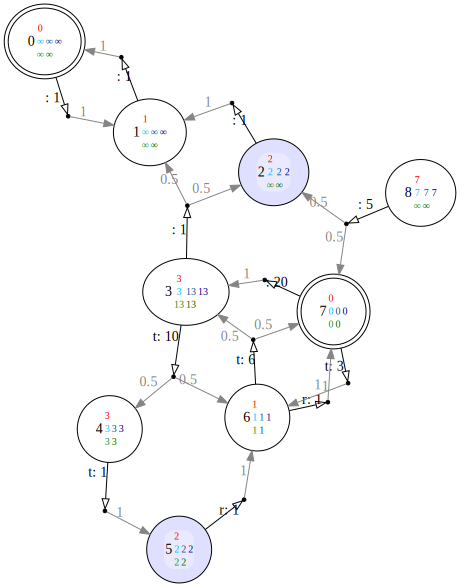

In [4]:
m.get_positiveReachability(t, 22)
m.get_almostSureReachability(t, 22)
m.get_Buchi(t, 22)
m

In [7]:
# %load -s basic reachability_examples.py
def basic():
    dot.dotpr = "neato"
    m = consMDP.ConsMDP()

    m.new_states(9)
    for s in [0, 7]:
        m.set_reload(s)

    m.add_action(0, {1:1}, "", 1)
    m.add_action(1, {0:1}, "", 1)
    m.add_action(2, {1:1}, "", 1)
    m.add_action(3, {2:.5, 1:.5}, "", 1)
    m.add_action(3, {4:.5, 6:.5},"t", 10)
    m.add_action(4, {5:1}, "t", 1)
    m.add_action(5, {6:1}, "r", 1)
    m.add_action(6, {3:.5, 7:.5}, "t", 6)
    m.add_action(6, {7:1}, "r", 1)
    m.add_action(7, {3:1}, "", 20)
    m.add_action(7, {6:1}, "t", 3)
    m.add_action(8, {7:.5, 2:.5}, "", 5)

    targets = set([2,5])
    
    return m, targets

## Little almost sure example
We have a choice to win almost-sure from 0. This is a counterexample for algorithm that recomputes `sufficient_levels` (after removing `3`) without setting `safe_values` to targets. To be more precise, after removing `3` no state is safe any more. But we do not care about reaching `T` again after reaching it once. Therefore, the `safe_value` of targets has to be non-∞.

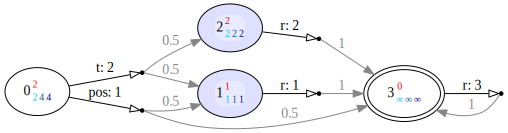

In [8]:
m, T = reachability_examples.little_alsure()
m.get_positiveReachability(T, 10)
m.get_almostSureReachability(T, 10)
m

In [9]:
# %load -s little_alsure reachability_examples.py
def little_alsure():
    dot.dotpr = "neato"
    dot.dotpr = "dot"
    m = consMDP.ConsMDP()
    m.new_states(4)
    for r in [3]:
        m.set_reload(r)
    m.add_action(0, {1:.5, 2:.5}, "t", 2)
    m.add_action(1,{3:1}, "r", 1)
    m.add_action(2,{3:1}, "r", 2)
    m.add_action(3,{3:1}, "r", 3)
    m.add_action(0,{1:.5, 3:.5},"pos",1)

    targets=set([1,2])
    return m, targets


## Little almost sure example #2
Not only targets need to have non-∞ value in the `reach_safe` (the right-most dark blue numbers) after removing reloads with positive reachability ∞. This has to be propagated further as ilustrated by the following example. If the `reach_safe[0]` would be ∞, the almostSureReachability of `4` would become ∞ as well while it should be 5. 

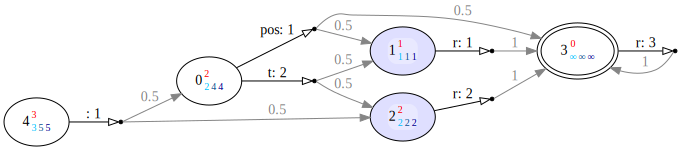

In [10]:
m, T = reachability_examples.little_alsure2()
m.get_positiveReachability(T, 5)
m.get_almostSureReachability(T, 5)
m

In [11]:
# %load -s little_alsure2 reachability_examples.py
def little_alsure2():
    m, T = little_alsure()
    m.new_state()
    m.add_action(4, {0:.5, 2:.5}, "", 1)
    return m, T


## The ultimate reachability & Büchi example
* It distinghuishes:
1. **Positive reachability** from **Sufficent levels**:
  - state 0: safe=2, pos_reach=5
2. **Almost-sure reachability** from **Positive reachability**
  - state 3: pos_reach=2, alsure_reach=3(via-reaload)/7
3. **Büchi** from **Almost-sure reachability**
  - state 6: alsure_reach=4, Büchi=10

* Some of the good paths go via a reload state.
  - almost-sure reachability+ of 3 goes via 4
  - everything from 5 goes via 4
* Includes little_alsure gadget.
  - states 6, 7, 9, 10

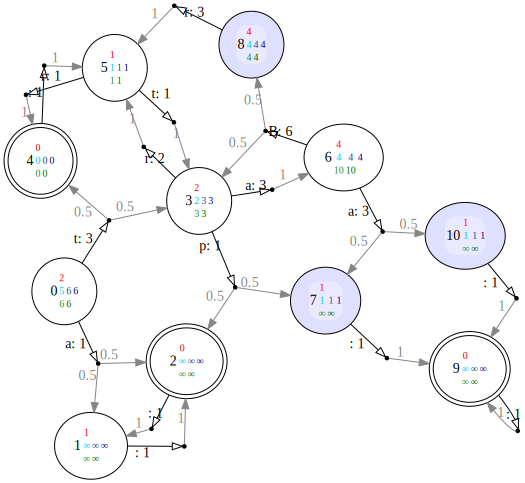

In [12]:
m, T = reachability_examples.ultimate()
m.get_positiveReachability(T,30)
m.get_almostSureReachability(T,30)
m.get_Buchi(T,30)
m

In [16]:
# %load -s ultimate reachability_examples.py
def ultimate():
    dot.dotpr="neato"
    m = consMDP.ConsMDP()
    m.new_states(11)
    for r in [2,4,9]:
        m.set_reload(r)
    T = {7, 8, 10}

    m.add_action(0,{1:.5,2:.5}, "a", 1)
    m.add_action(0,{3:.5,4:.5}, "t", 3)
    m.add_action(1,{2:1},"",1)
    m.add_action(2,{1:1},"",1)

    m.add_action(3,{2:.5, 7:.5},"p",1)
    m.add_action(3,{5:1},"r",2)
    m.add_action(3,{6:1},"a",3)

    m.add_action(4,{5:1},"",1)
    m.add_action(5,{4:1},"r",1)
    m.add_action(5,{3:1},"t",1)

    m.add_action(6,{7:.5, 10:.5}, "a", 3)
    m.add_action(6,{3:.5, 8:.5}, "B", 6)

    m.add_action(7,{9:1}, "", 1)
    m.add_action(9,{9:1}, "", 1)
    m.add_action(10,{9:1}, "", 1)

    m.add_action(8,{5:1}, "r", 3)

    return m, T


In [15]:
import decimal

def udist(iterable):
    c = len(iterable)
    mod = 100 % c
    decimal.getcontext().prec = 2
    #context=decimal.Context(prec=2, rounding=decimal.ROUND_FLOOR)
    prob = decimal.Decimal(1)/decimal.Decimal(c)
    dist = {i:prob for i in iterable}
    last = iterable[-1]
    dist[last] = dist[last] + decimal.Decimal("0.01")*mod
    return dist